In [3]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#importing data
gender = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
combine = pd.concat([train, test],axis=0)

In [3]:
#Show the training data
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
#Show the numerical data Q7
num = train[['Survived','Pclass','Age', 'SibSp', 'Parch', 'Fare']]

print(num.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [5]:
#categorical features Q8
cat = train [['Embarked', 'Cabin', 'Sex', 'Name']]
print(cat.describe())

       Embarked Cabin   Sex                                            Name
count       889   204   891                                             891
unique        3   147     2                                             891
top           S    G6  male  Spencer, Mrs. William Augustus (Marie Eugenie)
freq        644     4   577                                               1


In [6]:
#Correlation Pclass and survival rate Q9
coor = train[['Pclass', 'Survived']]
class1 = coor.Pclass == 1
Survived = coor.Survived == 1
count = 0
total = 0

for i in range(len(class1)):
    if class1[i] == True:
        total += 1

#Finds the average 
for i in range(len(class1)):
    if (class1[i] == True) and (Survived[i] == True):
        count += 1


#Calculating class1 average
print("the total people who survived in class1 was", count, "out of ",  total)
if count / total < .5:
    print("the average survival rate was less then 50%")
    
else:
    print("the average survival rate for class1 was higher than 50%")
    
print("class1 overall survival rate = ", count / total)

the total people who survived in class1 was 136 out of  216
the average survival rate for class1 was higher than 50%
class1 overall survival rate =  0.6296296296296297


In [7]:
#Were women more likely to survive? Q10
wcount = 0
mcount = 0
survived = train.Survived
women = train.Sex == "female"
wtotal = len(women)
survived_total = 0

#go through all the sexes
for i in range(len(women)):
    #calculate for women
    if (women[i] == True) and (survived[i] == 1):
        wcount += 1
        survived_total += 1
        
    #calculate for men
    if (women[i] == False) and (survived[i] == 1):
        mcount += 1
        survived_total += 1
    
    
print("Out of all the survivors ", wcount / survived_total, "were women")
print("Out of all the survivors", mcount / survived_total, "were men")

print("Nearly", wcount / wtotal, "women in total had survived")

Out of all the survivors  0.6812865497076024 were women
Out of all the survivors 0.31871345029239767 were men
Nearly 0.2615039281705948 women in total had survived


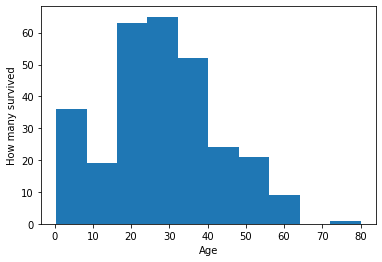

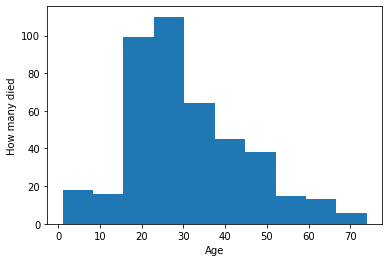

In [33]:
#plot between ages and survival Q11
survival_data = pd.read_csv("train.csv") #we call this dataset so we can pop the death count from it
death_data = pd.read_csv("train.csv")    #we call this dataset so we can pop the survived bodies from it
survived_age = survival_data.Age
dead_age = death_data.Age

#calculate for survived
for i in range(len(survived_age)):
    if survival_data.Survived[i] != 1:
        survived_age.pop(i)

#calculate for dead
for i in range(len(dead_age)):
    if death_data.Survived[i] == 1:
        dead_age.pop(i)
        
#survived
plt.xlabel('Age')
plt.ylabel('How many survived')
plt.hist(survived_age)
plt.show()

#dead
plt.xlabel('Age')
plt.ylabel('How many died')
plt.hist(dead_age)
plt.show()

Text(0.5, 1.0, 'Pclass = 3 | Survived = 0')

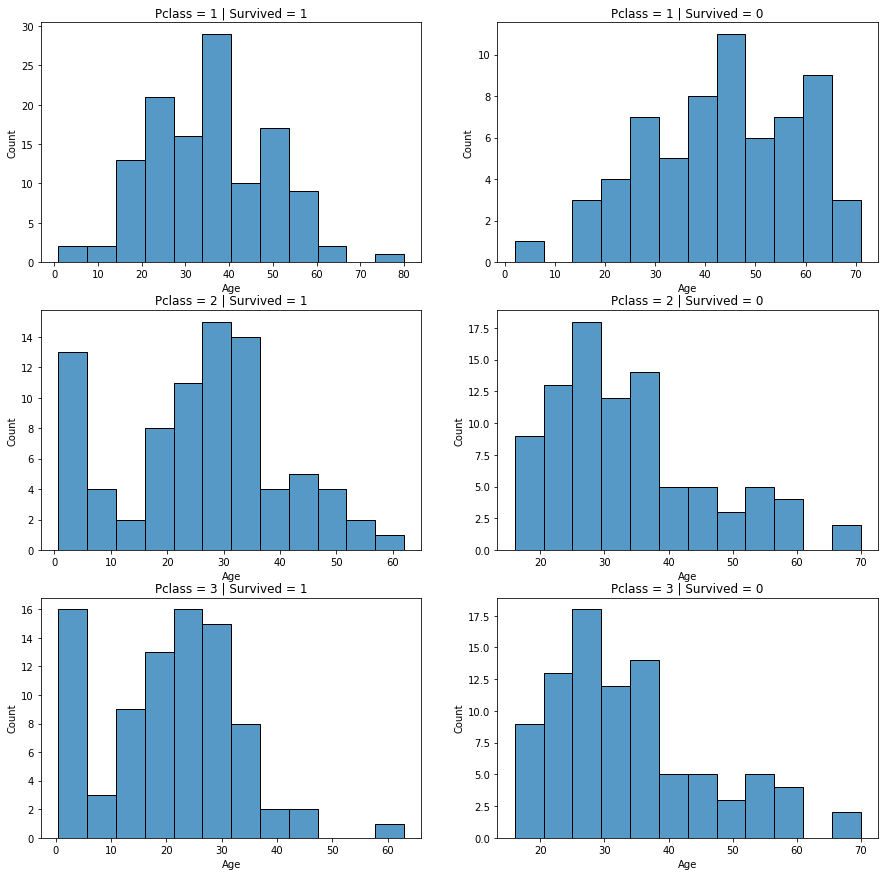

In [9]:
#Q12
import seaborn as sns

#Pclass = 1 & Survived = 1
Pclass_Survived = train.loc[:, ['Age', 'Pclass', 'Survived']]
P1_Survived = Pclass_Survived[Pclass_Survived['Survived'] == 1] 
P1_Survived = P1_Survived[P1_Survived['Pclass'] == 1]


fig, axs = plt.subplots(ncols=2, nrows=3, figsize = [15,15])
sns.histplot(x='Age', data=P1_Survived, ax=axs[0][0], bins=12).set_title('Pclass = 1 | Survived = 1')

#Pclass = 1 & Survived = 0
Pclass_dead = train.loc[:,['Age', 'Pclass', 'Survived']]
P1_dead = Pclass_dead[Pclass_dead['Survived'] == 0]
P1_dead = P1_dead[P1_dead['Pclass'] == 1]

sns.histplot(x = 'Age', data= P1_dead, ax = axs[0][1], bins = 12).set_title('Pclass = 1 | Survived = 0')



#Pclass = 2 & Survived = 1
Pclass_Survived = train.loc[:, ['Age', 'Pclass', 'Survived']]
P2_Survived = Pclass_Survived[Pclass_Survived['Survived'] == 1]
P2_Survived = P2_Survived[P2_Survived['Pclass'] == 2]

sns.histplot(x = 'Age', data = P2_Survived, ax = axs[1][0], bins = 12).set_title('Pclass = 2 | Survived = 1')


#Pclass = 2 & Survived = 0
Pclass_dead = train.loc[:,['Age', 'Pclass', 'Survived']]
P2_dead = Pclass_dead[Pclass_dead['Survived'] == 0]
P2_dead = P2_dead[P2_dead['Pclass'] == 2]

sns.histplot(x = 'Age', data= P2_dead, ax = axs[1][1], bins = 12).set_title('Pclass = 2 | Survived = 0')

#Pclass = 3 & Survived = 1
Pclass_Survived = train.loc[:, ['Age', 'Pclass', 'Survived']]
P3_Survived = Pclass_Survived[Pclass_Survived['Survived'] == 1]
P3_Survived = P3_Survived[P3_Survived['Pclass'] == 3]

sns.histplot(x = 'Age', data = P3_Survived, ax = axs[2][0], bins = 12).set_title('Pclass = 3 | Survived = 1')

#Pclass = 3 & Survived = 0
Pclass_dead = train.loc[:,['Age', 'Pclass', 'Survived']]
P3_dead = Pclass_dead[Pclass_dead['Survived'] == 0]
P3_dead = P2_dead[P2_dead['Pclass'] == 3]

sns.histplot(x = 'Age', data= P2_dead, ax = axs[2][1], bins = 12).set_title('Pclass = 3 | Survived = 0')

Text(0.5, 1.0, 'Embarked = C | Survived = 0')

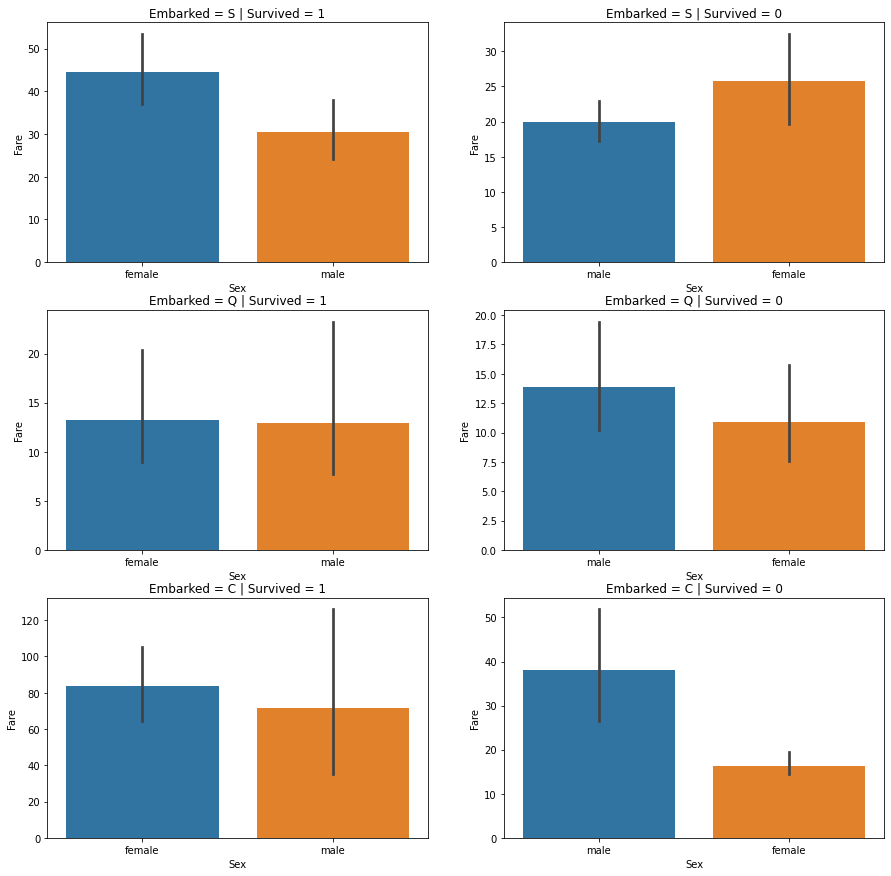

In [94]:
#Q13
fig, axs = plt.subplots(ncols=2, nrows=3, figsize = [15,15])

#Embarked S Survived
data = train.loc[:, ['Embarked', 'Fare', 'Survived', 'Sex']]
S = data[data['Survived'] == 1]
S = S[S['Embarked'] == 'S']

sns.barplot(x = 'Sex', y = 'Fare', data = S, ax = axs[0,0]).set_title('Embarked = S | Survived = 1')



#Embarked S Dead
data = train.loc[:, ['Embarked', 'Fare', 'Survived', 'Sex']]
S = data[data['Survived'] == 0] 
S = S[S['Embarked'] == 'S']

sns.barplot(x = 'Sex', y = 'Fare', data = S, ax = axs[0,1]).set_title('Embarked = S | Survived = 0')


#Embarked Q Survived
data = train.loc[:, ['Embarked', 'Fare', 'Survived', 'Sex']]
Q = data[data['Survived'] == 1] 
Q = Q[Q['Embarked'] == 'Q']

sns.barplot(x = 'Sex', y = 'Fare', data = Q, ax = axs[1,0]).set_title('Embarked = Q | Survived = 1')



#Embarked Q Dead
data = train.loc[:, ['Embarked', 'Fare', 'Survived', 'Sex']]
Q = data[data['Survived'] == 0] 
Q = Q[Q['Embarked'] == 'Q']

sns.barplot(x = 'Sex', y = 'Fare', data = Q, ax = axs[1,1]).set_title('Embarked = Q | Survived = 0')



#Embarked C Survived
data = train.loc[:, ['Embarked', 'Fare', 'Survived', 'Sex']]
C = data[data['Survived'] == 1] 
C = C[C['Embarked'] == 'C']

sns.barplot(x = 'Sex', y = 'Fare', data = C, ax = axs[2,0]).set_title('Embarked = C | Survived = 1')



#Embarked C Death
data = train.loc[:, ['Embarked', 'Fare', 'Survived', 'Sex']]
C = data[data['Survived'] == 0] 
C = C[C['Embarked'] == 'C']

sns.barplot(x = 'Sex', y = 'Fare', data = C, ax = axs[2,1]).set_title('Embarked = C | Survived = 0')


In [10]:
#Q14
data = train[['Ticket', 'Survived']]

#duplicate tickets
print(data['Ticket'].describe())
print("Out of 891 Tickets", (891 - 681) / 891, "are duplicated")


count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object
Out of 891 Tickets 0.2356902356902357 are duplicated


In [5]:
#Cabins Q15

data = combine['Cabin'].isnull()
print(data.describe())

count     1309
unique       2
top       True
freq      1014
Name: Cabin, dtype: object


In [10]:
#Convert Sex to Gender Q16
train = pd.read_csv("train.csv")
sex = train['Sex']
gender = np.empty(len(sex), dtype = int)

for i in range(len(gender)):
    if sex[i] == "female":
        gender[i] = 1
    if sex[i] == "male":
        gender[i] = 0
   
print(gender)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 

In [50]:
#K nearest Neighbor for Age Q17
from random import uniform
data = train.copy()
data = train['Age']

bool_data = data.isnull()
mean = data.mean()
std = data.std()

for i in range(len(bool_data)):
    if bool_data[i] == True: #if its null then insert a random value between the std and mean
        data[i] = uniform(std,mean) #uniform a for floats
        
print(data)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    18.083622
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [40]:
#Filling in Embarked Q18
data = train['Embarked']
bool_data = pd.isnull(data)

for i in range(len(bool_data)):
    if bool_data[i] == True:
        data[i] == 'S'
print(data)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [39]:
#Filling in Fare Q19
data = test['Fare']
bool_data = pd.isnull(data)


for i in range(len(bool_data)):
    if bool_data[i] == True:
        data[i] = 8.05

print(data)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


In [38]:
train = pd.read_csv("train.csv")
data = train.copy()
data = data['Fare']

for i in range(len(data)):
    if -.001 < data[i] <= 7.91:
        data[i] = 0
    elif 7.91 < data[i] <= 14.454:
        data[i] = 1
    elif 14.454 < data[i] <= 31.0:
        data[i] = 2
    elif 31.0 < data[i] <= 512.329:
        data[i] = 3
        
print(data)

0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64
